## **This notebook does the following:

Loads and inspects the dataset.

Runs missing values, duplicates, ID uniqueness checks.

Draws histograms for Age, Income, Loan Amount.

Shows loan type, approval, and default distributions.

Reports potential data inconsistencies.

Feature engineering

Predictive Modelling**

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Data

In [301]:
df=pd.read_csv('/content/Loan_data.csv')

Basic Info

In [264]:
print("Shape of dataset:", df.shape)
print("\n--- Head ---")
print(df.head())
print("\n--- Info ---")
print(df.info())
print("\n--- Numeric Summary ---")
print(df.describe())
print("\n--- Categorical Summary ---")
print(df.describe(include="object"))


Shape of dataset: (5000, 17)

--- Head ---
  Customer_ID  Age  Gender  Income Employment_Type   Loan_ID  Loan_Type  \
0    CUST1000   59  Female   62399        Salaried  LOAN5000       Auto   
1    CUST1001   49    Male   64013   Self-Employed  LOAN5001       Home   
2    CUST1002   35  Female  165778        Salaried  LOAN5002  Education   
3    CUST1003   63  Female  189303   Self-Employed  LOAN5003  Education   
4    CUST1004   28  Female   47909   Self-Employed  LOAN5004  Education   

   Loan_Amount  Interest_Rate  Tenure_Months Application_Date Approval_Status  \
0       885209          15.11             12       2024-01-24        Approved   
1      1314330          17.24             24       2022-11-29        Approved   
2       202973          17.74             12       2024-10-24        Approved   
3      1092201          13.92             36       2025-06-26        Approved   
4      1934974           7.13            180       2025-02-23        Approved   

   EMI_Amount Disbu

In [302]:
df['Application_Date'] = pd.to_datetime(df['Application_Date'])
df['Disbursal_Date'] = pd.to_datetime(df['Disbursal_Date'])


Sanity Checks

In [303]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
 Customer_ID              0
Age                      0
Gender                   0
Income                   0
Employment_Type          0
Loan_ID                  0
Loan_Type                0
Loan_Amount              0
Interest_Rate            0
Tenure_Months            0
Application_Date         0
Approval_Status          0
EMI_Amount               0
Disbursal_Date         987
EMIs_Paid                0
Default_Status           0
Outstanding_Balance      0
dtype: int64

Duplicate Rows: 0


Check unique identifiers

In [304]:
if "Customer_ID" in df.columns:
    print("Unique Customer IDs:", df["Customer_ID"].nunique())
if "Loan_ID" in df.columns:
    print("Unique Loan IDs:", df["Loan_ID"].nunique())


Unique Customer IDs: 5000
Unique Loan IDs: 5000


**Use median/most frequent gap (Approval → Disbursal)**

Calculate the typical gap (e.g., median days between Application_Date and Disbursal_Date).

Fill missing with Application_Date + median_gap.

In [342]:
df['Disbursal_Date'] = pd.to_datetime(df['Disbursal_Date'])
df['Application_Date'] = pd.to_datetime(df['Application_Date'])

# Calculate gap
df['gap_days'] = (df['Disbursal_Date'] - df['Application_Date']).dt.days
median_gap = df['gap_days'].median()

# Fill nulls
df.loc[df['Disbursal_Date'].isnull(), 'Disbursal_Date'] = (
    df.loc[df['Disbursal_Date'].isnull(), 'Application_Date'] + pd.to_timedelta(median_gap, unit='D')
)


Outliers (Boxplots)

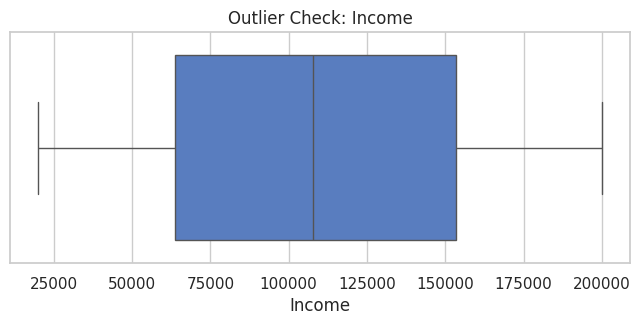

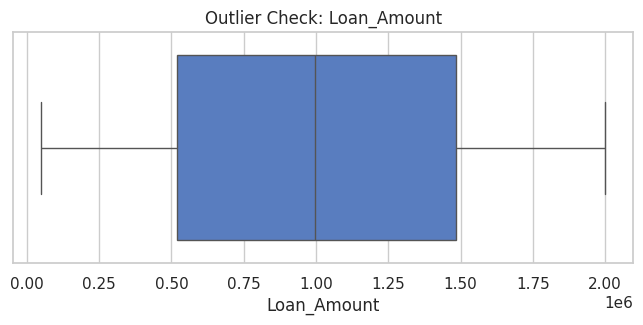

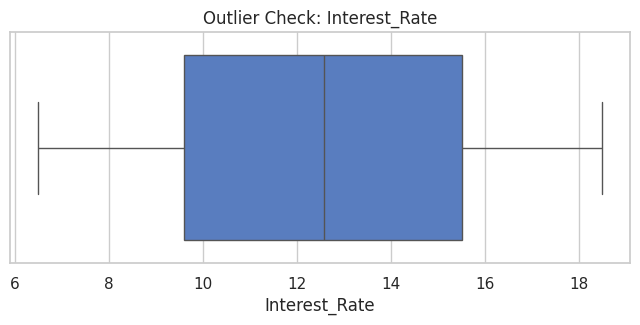

In [306]:
num_cols = ["Income", "Loan_Amount", "Interest_Rate"]
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8,3))
        sns.boxplot(x=df[col])
        plt.title(f"Outlier Check: {col}")
        plt.show()

Data Consistency Checks

In [307]:
if "Approval_Status" in df.columns and "Disbursal_Date" in df.columns:
    invalid_cases = df[(df["Approval_Status"] == "Approved") & (df["Disbursal_Date"].isnull())]
    print("Approved but missing Disbursal Date:", invalid_cases.shape[0])

if "Default_Status" in df.columns:
    print("Unique Default Status values:", df["Default_Status"].unique())


Approved but missing Disbursal Date: 0
Unique Default Status values: ['No' 'Yes']


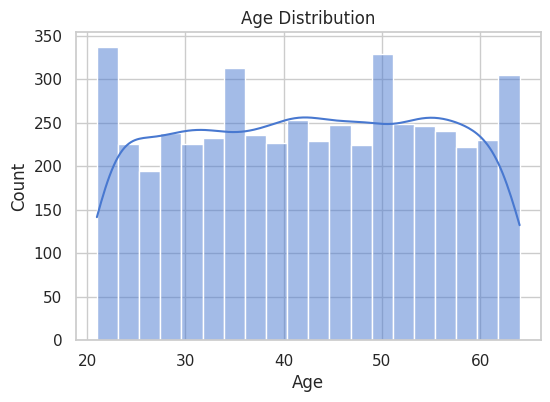

In [308]:
# Age Distribution
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Age"], kde=True, bins=20)
    plt.title("Age Distribution")
    plt.show()

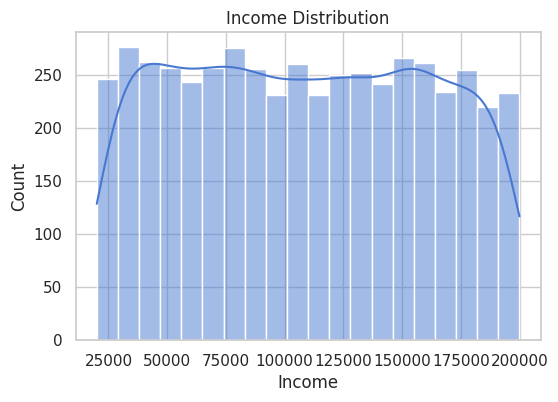

In [309]:
# Income Distribution
if "Income" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Income"], kde=True, bins=20)
    plt.title("Income Distribution")
    plt.show()


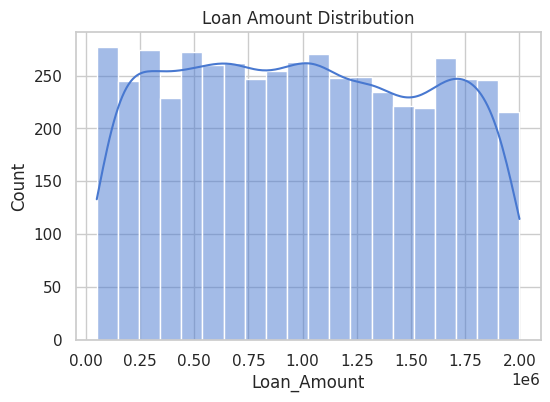

In [310]:
# Loan Amount Distribution
if "Loan_Amount" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Loan_Amount"], kde=True, bins=20)
    plt.title("Loan Amount Distribution")
    plt.show()

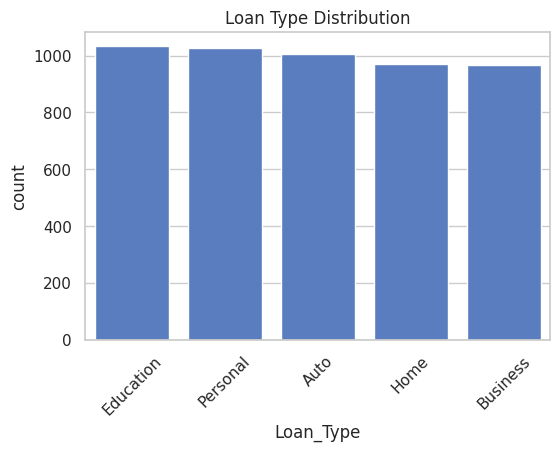

In [311]:
# Loan Type Counts
if "Loan_Type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Loan_Type", order=df["Loan_Type"].value_counts().index)
    plt.title("Loan Type Distribution")
    plt.xticks(rotation=45)
    plt.show()

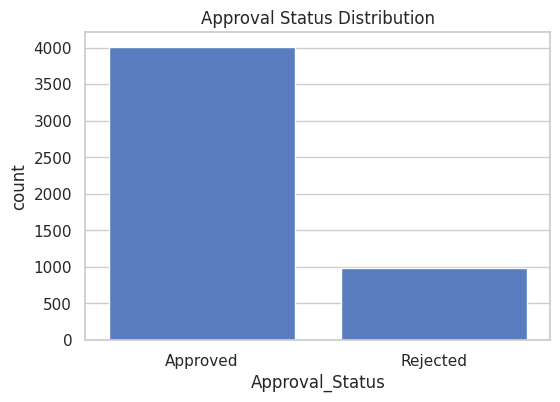

In [312]:
# Approval Status Counts
if "Approval_Status" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Approval_Status")
    plt.title("Approval Status Distribution")
    plt.show()



Default Rate per Loan Type:
 Default_Status        No       Yes
Loan_Type                         
Auto            0.424303  0.575697
Business        0.416322  0.583678
Education       0.415698  0.584302
Home            0.426365  0.573635
Personal        0.421463  0.578537


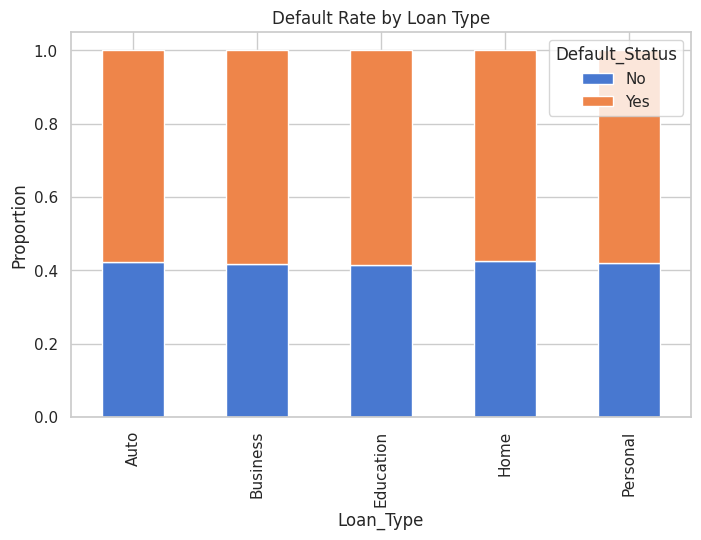

In [313]:
# Default Rate per Loan Type
if "Loan_Type" in df.columns and "Default_Status" in df.columns:
    default_rate = df.groupby("Loan_Type")["Default_Status"].value_counts(normalize=True).unstack().fillna(0)
    print("\nDefault Rate per Loan Type:\n", default_rate)
    default_rate.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.title("Default Rate by Loan Type")
    plt.ylabel("Proportion")
    plt.show()

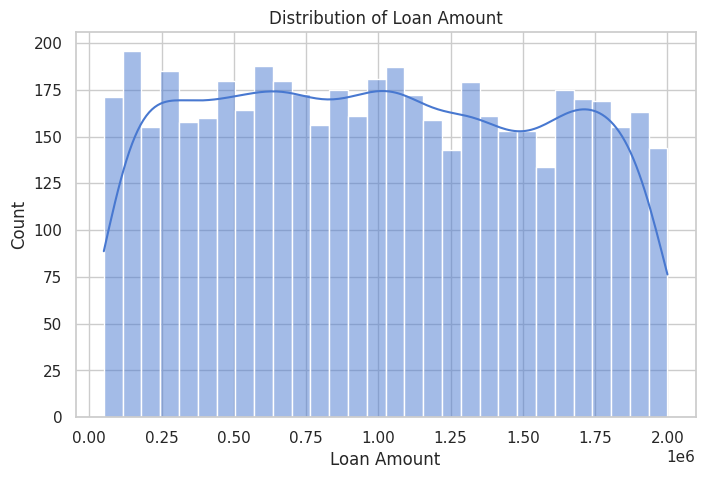

In [314]:
# Distribution of Loan Amount
plt.figure(figsize=(8,5))
sns.histplot(df['Loan_Amount'], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()


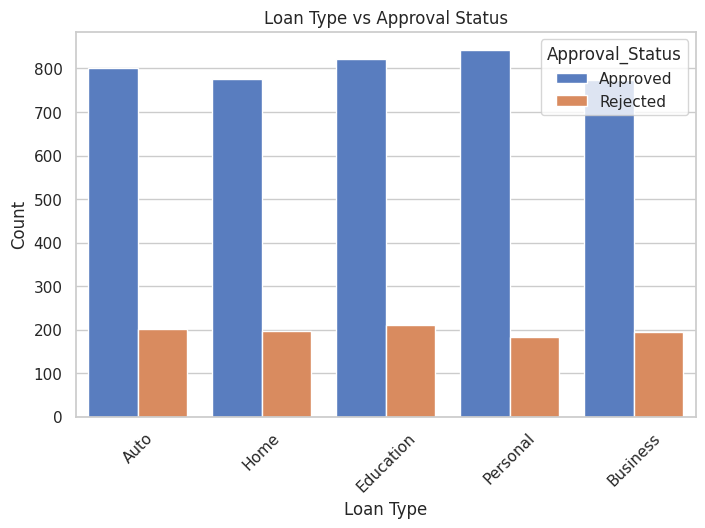

In [315]:
# Loan Type vs Approval Status (Bar chart)
plt.figure(figsize=(8,5))
sns.countplot(x="Loan_Type", hue="Approval_Status", data=df)
plt.title("Loan Type vs Approval Status")
plt.xlabel("Loan Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


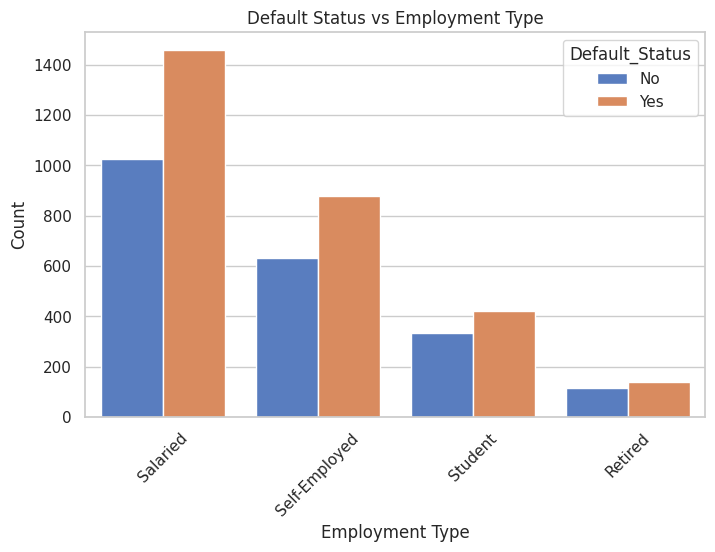

In [316]:
# Default Status vs Employment Type (Bar chart)
plt.figure(figsize=(8,5))
sns.countplot(x="Employment_Type", hue="Default_Status", data=df)
plt.title("Default Status vs Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

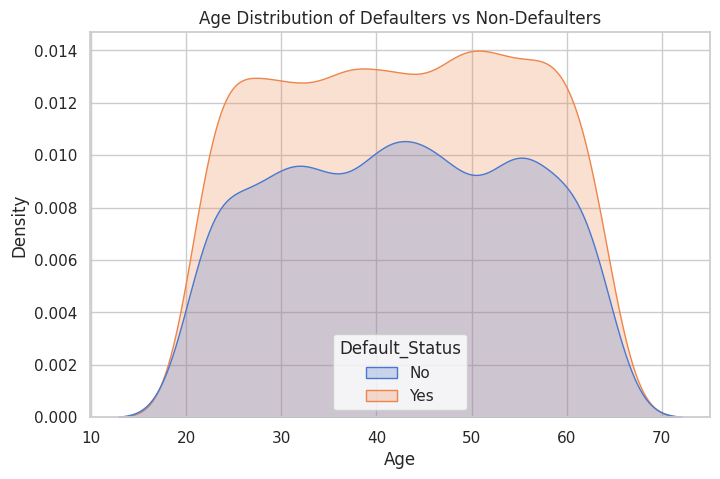

In [317]:
# Age distribution of Defaulters vs Non-Defaulters
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Age", hue="Default_Status", fill=True)
plt.title("Age Distribution of Defaulters vs Non-Defaulters")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [344]:
# Identify numerical and categorical columns dynamically
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['Age', 'Income', 'Loan_Amount', 'Interest_Rate', 'Tenure_Months', 'EMI_Amount', 'EMIs_Paid', 'Outstanding_Balance', 'gap_days', 'Debt_to_Income', 'EMI_Burden', 'Payment_Progress', 'Application_to_Disbursal', 'Loan_per_Month']
Categorical Columns: ['Customer_ID', 'Gender', 'Employment_Type', 'Loan_ID', 'Loan_Type', 'Approval_Status', 'Default_Status']


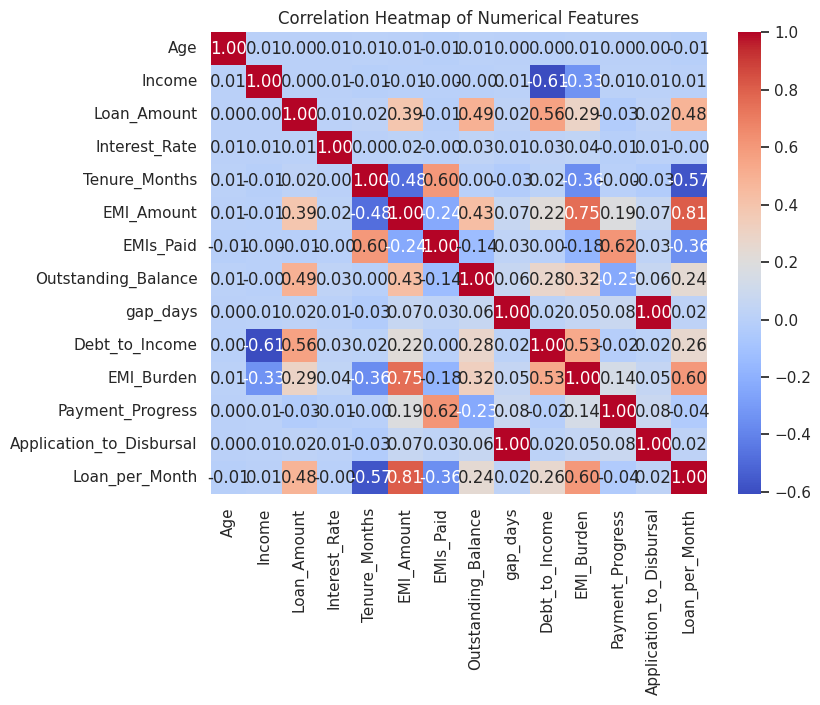

In [345]:
# Correlation Heatmap (numerical features only)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


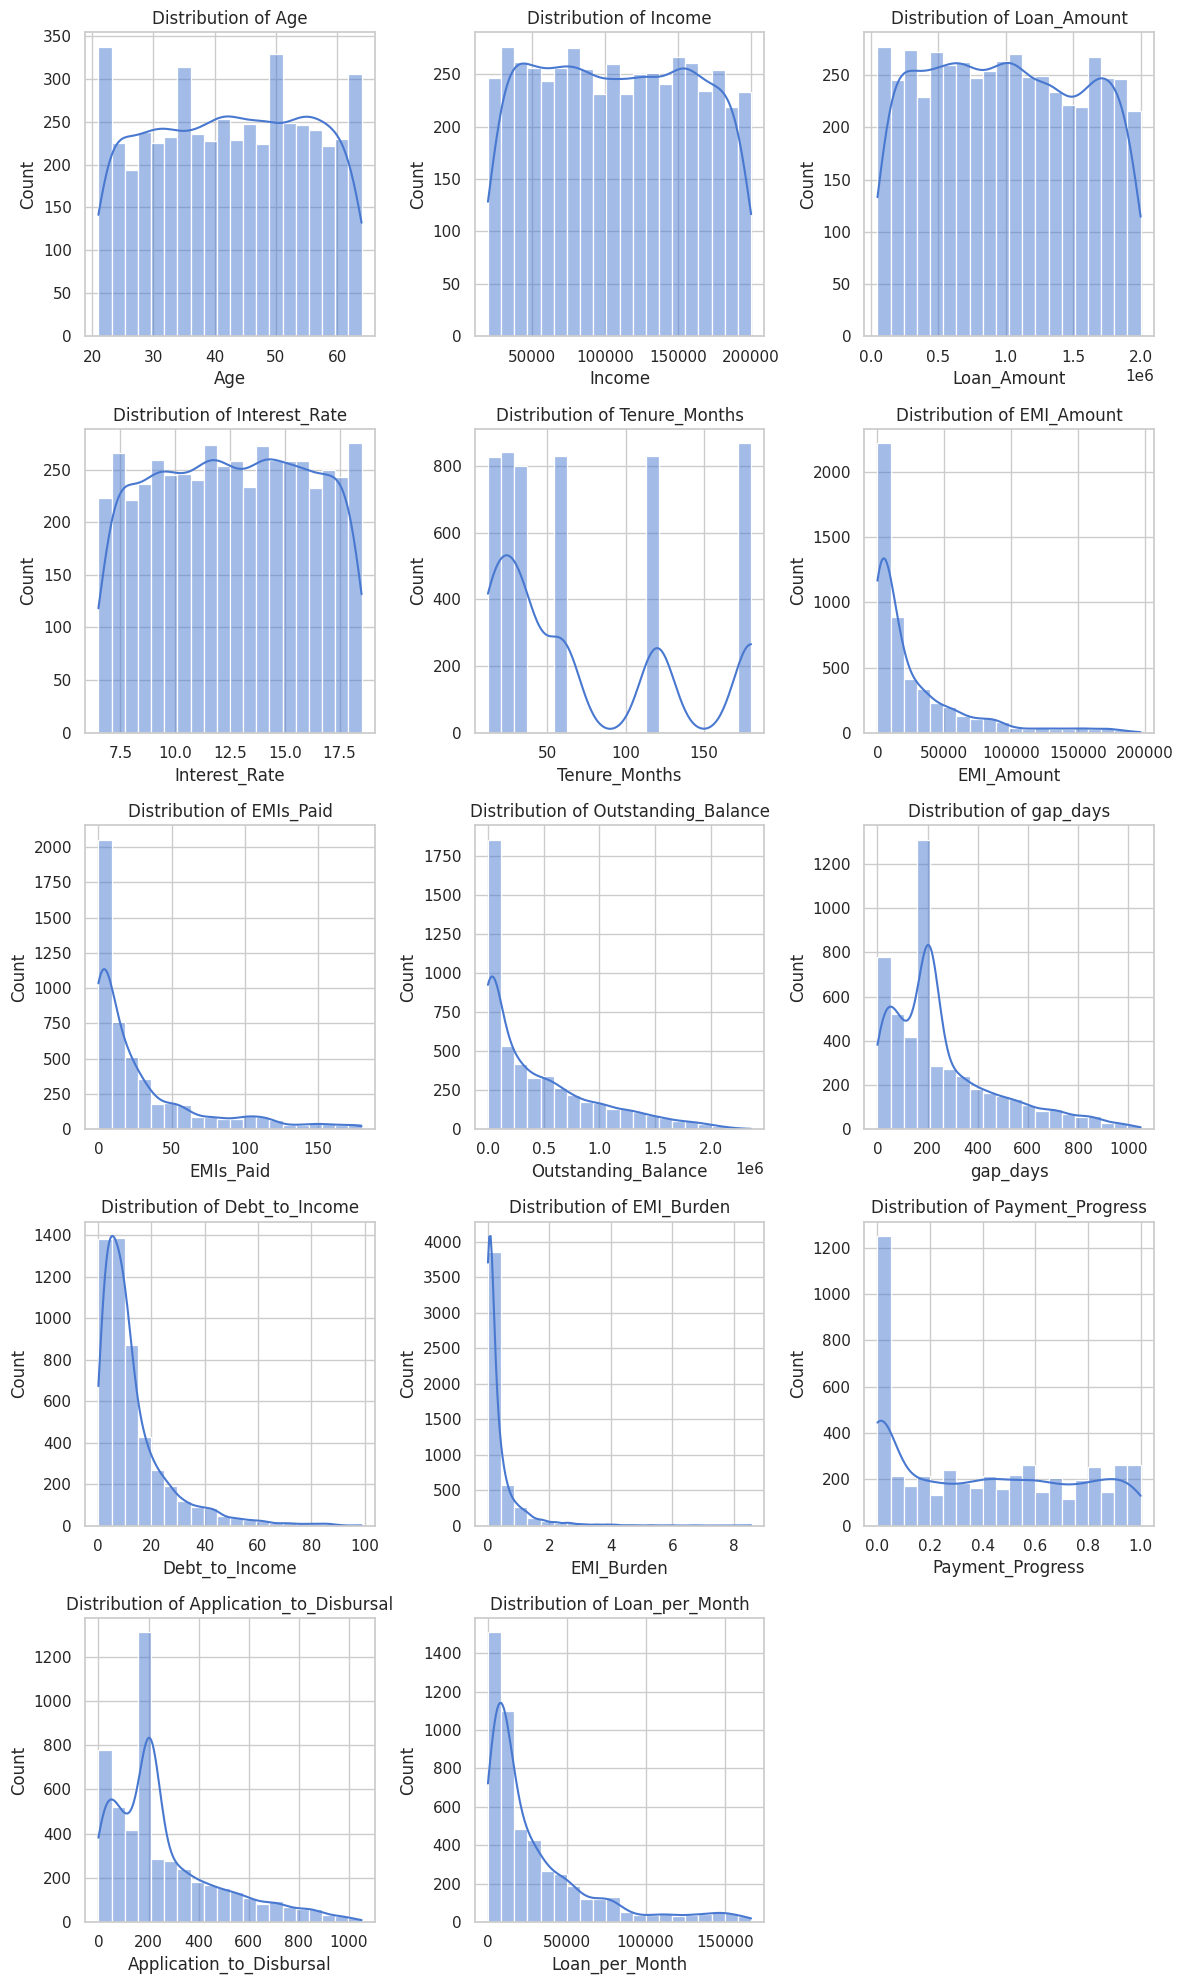

In [346]:
# categorical vs Approval_Status plots
import math

# Number of subplots layout
n_cols = 3  # plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

axes = axes.flatten()  # make axes iterable

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove extra empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


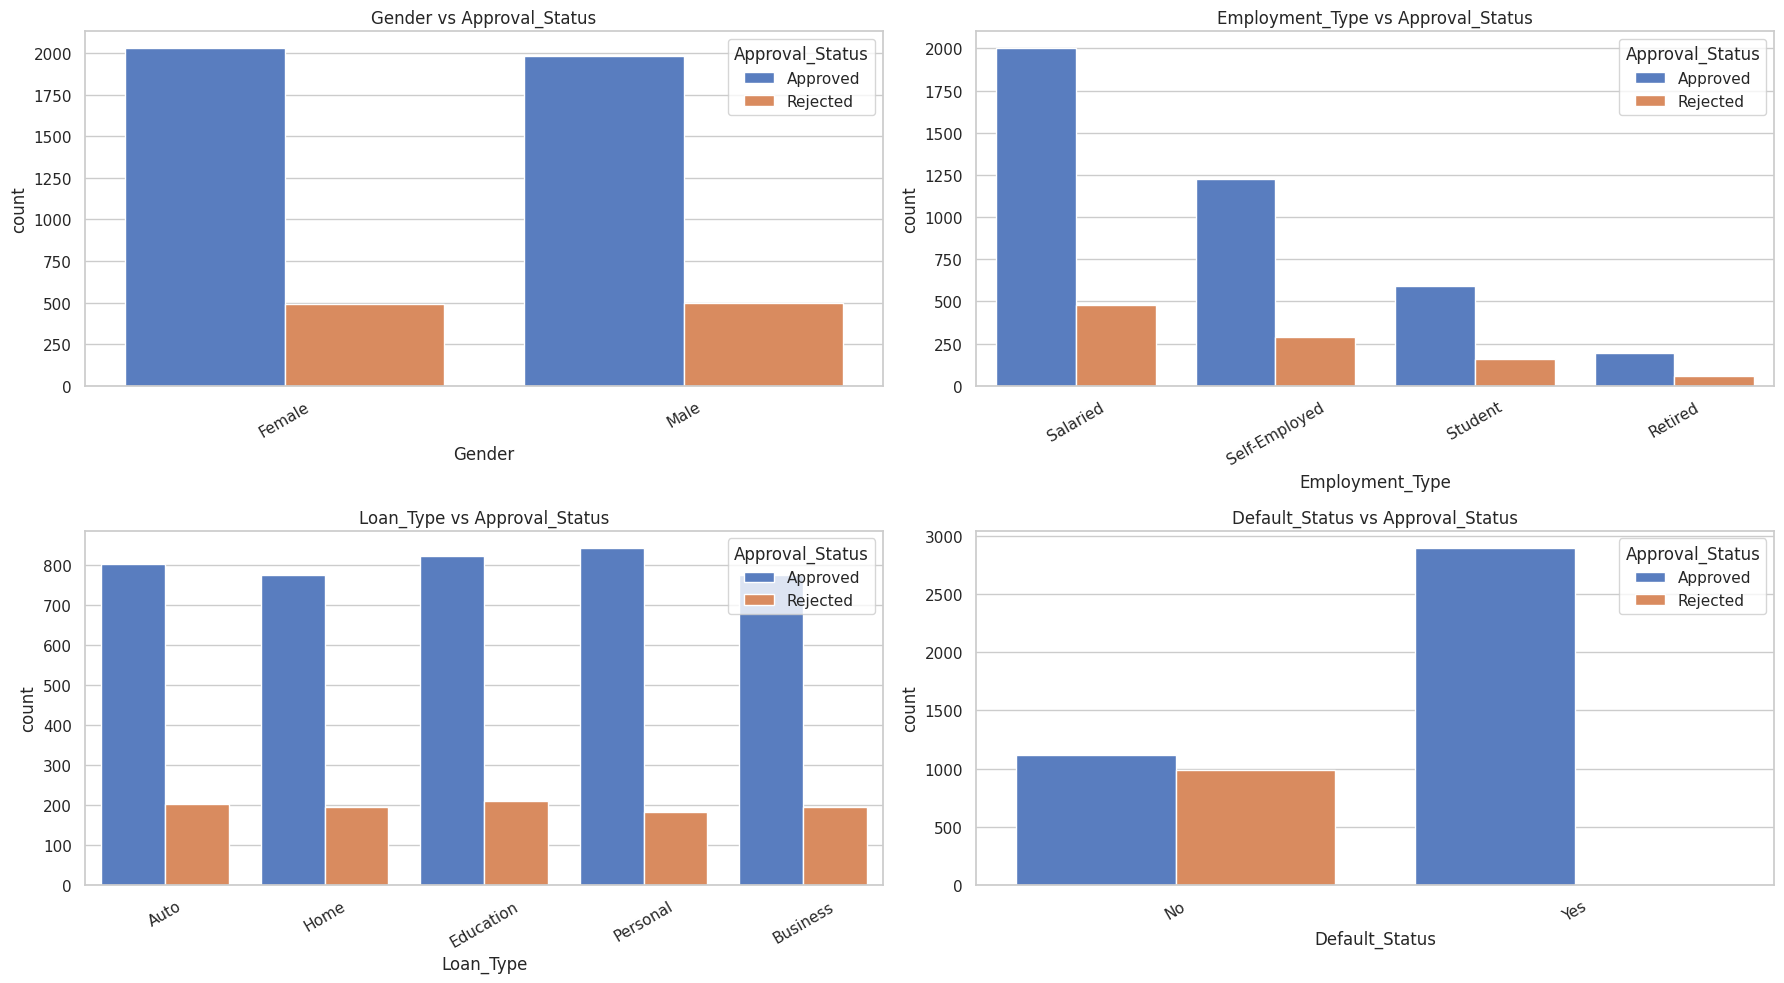

In [347]:
# Define exclusion list
exclude_cols = ['Customer_ID', 'Loan_ID', 'Application_Date','Disbursal_Date']

# Filter categorical columns (excluding Approval_Status and IDs/dates)
cat_to_plot = [col for col in cat_cols if col not in exclude_cols and col != 'Approval_Status']

# Number of rows and columns
n_cols = 2
n_rows = math.ceil(len(cat_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_to_plot):
    sns.countplot(data=df, x=col, hue='Approval_Status', ax=axes[i])
    axes[i].set_title(f"{col} vs Approval_Status")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


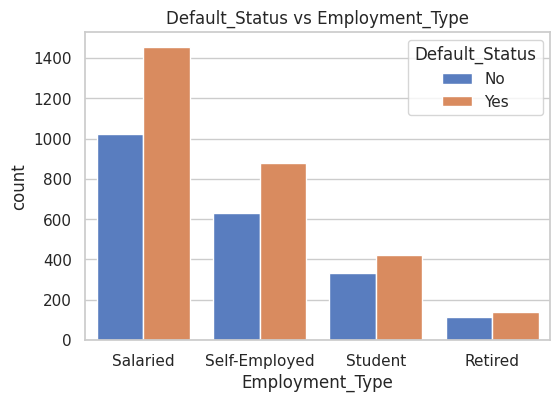

In [323]:
# Default_Status vs Employment_Type (if both exist)

if 'Default_Status' in df.columns and 'Employment_Type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Employment_Type', hue='Default_Status')
    plt.title("Default_Status vs Employment_Type")
    plt.show()

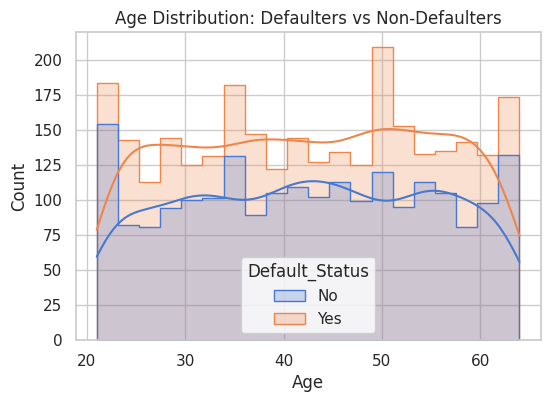

In [324]:
#  Age Distribution of Defaulters vs Non-Defaulters

if 'Default_Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x='Age', hue='Default_Status', kde=True, bins=20, element="step")
    plt.title("Age Distribution: Defaulters vs Non-Defaulters")
    plt.show()

# Feature Engineering

In [325]:
# Debt-to-Income Ratio(How much loan amount is being requested compared to income.)

df['Debt_to_Income'] = df['Loan_Amount'] / df['Income']

In [326]:
# EMI Burden(Proportion of EMI compared to monthly income.)

df['EMI_Burden'] = df['EMI_Amount'] / df['Income']

In [327]:
# Payment Progress (EMIs Paid %).Progress of loan repayment vs total tenure.

df['Payment_Progress'] = df['EMIs_Paid'] / df['Tenure_Months']

In [328]:
#Application-to-Disbursal Days(How long it took from application to disbursal.)

df['Application_to_Disbursal'] = (df['Disbursal_Date'] - df['Application_Date']).dt.days

In [330]:
#Loan-to-Tenure Ratio(Loan amount spread across tenure.)

df['Loan_per_Month'] = df['Loan_Amount'] / df['Tenure_Months']

# **Predictive Modeling**

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [348]:
#Categorical Encoding (for ML later).Convert Employment_Type, Loan_Type, Approval_Status into numeric (label/one-hot).

df_encoded = pd.get_dummies(df, columns=['Gender','Employment_Type','Loan_Type','Approval_Status'], drop_first=True)

In [350]:
# Define Features & Target

X = df_encoded.drop(['Customer_ID','Loan_ID','Default_Status'], axis=1)   # Features
y = df_encoded['Default_Status']                # Target (0 = Non-default, 1 = Default)




In [352]:
# 2. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [354]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


In [355]:
# Feature Scaling

scaler = StandardScaler()

# Fit and transform numeric columns only
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_cols]),
    columns=numeric_cols,
    index=X_test.index
)


In [356]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 232 to 3005
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Income                    1000 non-null   float64
 2   Loan_Amount               1000 non-null   float64
 3   Interest_Rate             1000 non-null   float64
 4   Tenure_Months             1000 non-null   float64
 5   EMI_Amount                1000 non-null   float64
 6   EMIs_Paid                 1000 non-null   float64
 7   Outstanding_Balance       1000 non-null   float64
 8   gap_days                  1000 non-null   float64
 9   Debt_to_Income            1000 non-null   float64
 10  EMI_Burden                1000 non-null   float64
 11  Payment_Progress          1000 non-null   float64
 12  Application_to_Disbursal  1000 non-null   float64
 13  Loan_per_Month            1000 non-null   float64
dtypes: float64(

In [357]:
# 4. Model Training
# ---------------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    results[name] = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }



In [358]:
# Display Results

for name, metrics in results.items():
    print(f"\n===== {name} =====")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("\nClassification Report:\n")
    print(pd.DataFrame(metrics["Classification Report"]).transpose())
    print("\nROC-AUC Score:", metrics["ROC-AUC"])



===== Logistic Regression =====
Confusion Matrix:
 [[421   0]
 [  3 576]]

Classification Report:

              precision    recall  f1-score   support
No             0.992925  1.000000  0.996450   421.000
Yes            1.000000  0.994819  0.997403   579.000
accuracy       0.997000  0.997000  0.997000     0.997
macro avg      0.996462  0.997409  0.996926  1000.000
weighted avg   0.997021  0.997000  0.997001  1000.000

ROC-AUC Score: 1.0

===== Decision Tree =====
Confusion Matrix:
 [[420   1]
 [  2 577]]

Classification Report:

              precision    recall  f1-score   support
No             0.995261  0.997625  0.996441   421.000
Yes            0.998270  0.996546  0.997407   579.000
accuracy       0.997000  0.997000  0.997000     0.997
macro avg      0.996765  0.997085  0.996924  1000.000
weighted avg   0.997003  0.997000  0.997000  1000.000

ROC-AUC Score: 0.9970852358271899

===== Random Forest =====
Confusion Matrix:
 [[421   0]
 [  0 579]]

Classification Report:

         

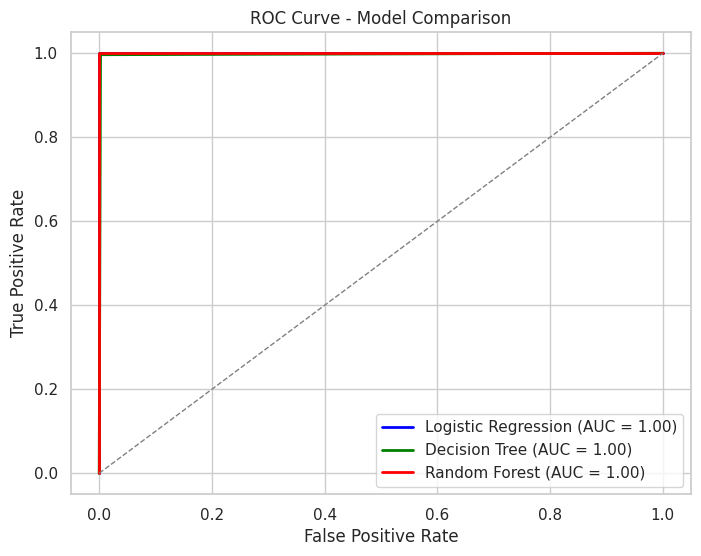

In [365]:
plt.figure(figsize=(8,6))

colors = ['blue', 'green', 'red']

for (name, model), color in zip(models.items(), colors):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Yes')  # Specify positive class
    auc_score = roc_auc_score(y_test.map({'No':0,'Yes':1}), y_prob)  # Convert for AUC
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], '--', color='gray', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
